<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%90%D0%B2%D1%82%D0%BE%D1%8D%D0%BD%D0%BA%D0%BE%D0%B4%D0%B5%D1%80%D1%8B_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B8%D1%81%D0%BA%D0%B0_%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B9_%D0%BD%D0%B0_%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D0%B5_%D1%81%D0%BE%D0%B4%D0%B5%D1%80%D0%B6%D0%B8%D0%BC%D0%BE%D0%B3%D0%BE_%D1%81_%D0%BF%D0%BE%D0%BC%D0%BE%D1%89%D1%8C%D1%8E_Keras_%D0%B8_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Автоэнкодеры для поиска изображений на основе содержимого с помощью Keras и TensorFlow

# Autoencoders for content-based image search with Keras and TensorFlow

В этом уроке вы узнаете, как использовать сверточные автоэнкодеры для создания системы поиска изображений на основе содержимого (т. е. Системы поиска изображений) с использованием Keras и TensorFlow.


In this tutorial, you will learn how to use convolutional autoencoders to create a content-based image search engine (i.e. Image Search Engine) using Keras and TensorFlow.



Системы поиска изображений находит все визуально похожие / релевантные изображения в своей базе данных и возвращает их вам ( точно так же, как система текстового поиска возвращает ссылки на статьи, сообщения в блогах и т. д.).

Image search engines find all visually similar / relevant images in their database and return them to you (just like a text search engine returns links to articles, blog posts, etc.).



CBIR (Content-based Image Retrieval) на основе глубокого обучения и поиск изображений можно рассматривать как форму обучения без учителя:



CBIR (Content-based Image Retrieval) based deep learning and image retrieval can be thought of as a form of unsupervised learning:


* При обучении автоэнкодера мы не используем метки классов. When training an autoencoder, we do not use class labels.
* Автокодировщик используется для вычисления векторного представления скрытого пространства для каждого изображения в нашем наборе данных (то есть нашего «вектора признаков» для данного изображения). An autoencoder is used to compute a vector representation of the hidden space for each image in our dataset (that is, our "feature vector" for a given image).
* Во время поиска мы вычисляем расстояние между векторами скрытого пространства - чем меньше расстояние, тем более релевантными / визуально похожими являются два изображения. During the search, we calculate the distance between the vectors of the hidden space - the smaller the distance, the more relevant / visually similar the two images are.



Таким образом, мы можем разбить реализацию CBIR на три отдельных этапа:

Thus, we can split the CBIR implementation into three distinct phases:

Этап №1: Обучение автоэнкодера. Stage 1: Learning the autoencoder
Этап №2: Извлечение признаков из всех изображений в нашем наборе данных путем вычисления их представлений в скрытом пространстве с помощью автоэнкодера. Stage # 2: Extract features from all images in our dataset by computing their hidden space representations using an autoencoder.
Этап №3: Сравнение векторов скрытого пространства, чтобы найти все соответствующие изображения в наборе данных. Step # 3: Comparison of the hidden space vectors to find all matching images in the dataset.



### Установите необходимые пакеты
### Install the necessary packages

In [1]:
!pip install tensorflow==2.2.0

     |████████████████████████████████| 516.2 MB 4.6 kB/s 
     |████████████████████████████████| 3.0 MB 45.3 MB/s 
     |████████████████████████████████| 454 kB 42.3 MB/s 
     |████████████████████████████████| 2.9 MB 43.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.0
    Uninstalli

### Скачать zip-файл с кодом
### Download the code zip file

In [2]:
!wget http://dataudt.ru/datasets/cv/Lesson_38.keras_autoencoder_cbir.zip
!unzip -qq Lesson_38.keras_autoencoder_cbir.zip
%cd /content/Lesson_38.keras_autoencoder_cbir

--2022-02-21 06:09:32--  http://dataudt.ru/datasets/cv/Lesson_38.keras_autoencoder_cbir.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5727285 (5.5M) [application/zip]
Saving to: ‘Lesson_38.keras_autoencoder_cbir.zip’

Lesson_38.keras_aut 100%[===================>]   5.46M  5.03MB/s    in 1.1s    

2022-02-21 06:09:34 (5.03 MB/s) - ‘Lesson_38.keras_autoencoder_cbir.zip’ saved [5727285/5727285]

/content/Lesson_38.keras_autoencoder_cbir


### Импорт библиотек
### Import Packages

In [3]:
# импортируем необходимые библиотеки
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model
from imutils import build_montages
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2

### Функция отображения изображений в Jupyter Notebooks и Google Colab
### Function to display images in Jupyter Notebooks and Google Colab

In [4]:
def plt_imshow(title, image):
    # конвертируем изображение из формата BGR в RGB и отображаем его 
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Реализация архитектуры сверточного автокодировщика для поиска изображений
### Implementing our convolutional autoencoder architecture for image retrieval

In [5]:
class ConvAutoencoder:
	@staticmethod
	def build(width, height, depth, filters=(32, 64), latentDim=16):
        # инициализируем вход модели как
		# "последние каналы" и самой размерностью каналов
		# initialize the input shape to be "channels last" along with
		# the channels dimension itself
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

        # определяем вход модели для энкодера
		# define the input to the encoder
		inputs = Input(shape=inputShape)
		x = inputs

        # перебираем все фильтры
		# loop over the number of filters
		for f in filters:
            # применяем свертку => функцию активации RELU => батч-нормализацию
			# apply a CONV => RELU => BN operation
			x = Conv2D(f, (3, 3), strides=2, padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

        # сгладим сеть, а затем построим наш скрытый вектор
		# flatten the network and then construct our latent vector
		volumeSize = K.int_shape(x)
		x = Flatten()(x)
		latent = Dense(latentDim, name="encoded")(x)

        # начнем построение модели декодера, которая будет принимать
		# на вход выходные значения энкодера
		# start building the decoder model which will accept the
		# output of the encoder as its inputs
		x = Dense(np.prod(volumeSize[1:]))(latent)
		x = Reshape((volumeSize[1], volumeSize[2], volumeSize[3]))(x)

        # снова перебираем все фильтры, но на этот раз в
		# обратном порядке
		# loop over our number of filters again, but this time in
		# reverse order
		for f in filters[::-1]:
            # применяем свертку => функцию активации RELU => батч-нормализацию
			# apply a CONV_TRANSPOSE => RELU => BN operation
			x = Conv2DTranspose(f, (3, 3), strides=2,
				padding="same")(x)
			x = LeakyReLU(alpha=0.2)(x)
			x = BatchNormalization(axis=chanDim)(x)

        # применяем один слой CONV_TRANSPOSE, используемый для восстановления
		# исходной глубины изображения
		# apply a single CONV_TRANSPOSE layer used to recover the
		# original depth of the image
		x = Conv2DTranspose(depth, (3, 3), padding="same")(x)
		outputs = Activation("sigmoid", name="decoded")(x)

        # построим нашу модель автоэнкодера
		# construct our autoencoder model
		autoencoder = Model(inputs, outputs, name="autoencoder")

        # возвращаем модель автоэнкодера
		# return the autoencoder model
		return autoencoder

### Создание кода обучения для автоэнкодера
### Creating the autoencoder training script using Keras and TensorFlow

In [6]:
def visualize_predictions(decoded, gt, samples=10):
    # инициализируем наш список выходных изображений
	# initialize our list of output images
	outputs = None

    # перебираем все выходные примеры
	# loop over our number of output samples
	for i in range(0, samples):
        # возьмем исходное изображение и измененное изображение
		# grab the original image and reconstructed image
		original = (gt[i] * 255).astype("uint8")
		recon = (decoded[i] * 255).astype("uint8")

        # совмещаем исходное и выходное изображения сторона к стороне
		# stack the original and reconstructed image side-by-side
		output = np.hstack([original, recon])

        # если выходной массив пуст, инициализируем его как текущее
		# объединенное изображение
		# if the outputs array is empty, initialize it as the current
		# side-by-side image display
		if outputs is None:
			outputs = output

        # в противном случае складываем выходные изображения вертикально
		# otherwise, vertically stack the outputs
		else:
			outputs = np.vstack([outputs, output])

    # возвращаем выходное изображение
	# return the output images
	return outputs

In [7]:
# явно укажем аргументы необходимые для работы
# model - путь к выходному обученному автоэнкодеру
# vis - путь к выходному файлу визуализации реконструкции
# plot - путь к выходному файлу с графиком

# explicitly specify the arguments needed to work
# model - path to output trained autoencoder
# vis - path to output reconstruction visualization file
# plot - path to output plot file
args = {
	"model": "output/autoencoder.h5",
	"vis": "recon_vis.png",
	"plot": "plot.png"
}

In [8]:
# инициализируем количество эпох для обучения, начальную скорость обучения,
# и размер батча
# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 20
INIT_LR = 1e-3
BS = 32

# загружаем набор данных MNIST
# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

# добавляем размерность канала к каждому изображению в наборе данных, затем нормируем
# яркость пикселей в диапазоне [0, 1]
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# построим наш сверточный автоэнкодер
# construct our convolutional autoencoder
print("[INFO] building autoencoder...")
autoencoder = ConvAutoencoder.build(28, 28, 1)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
autoencoder.compile(loss="mse", optimizer=opt)

# обучим наш сверточный автоэнкодер
# train the convolutional autoencoder
H = autoencoder.fit(
	trainX, trainX,
	validation_data=(testX, testX),
	epochs=EPOCHS,
	batch_size=BS)

[INFO] loading MNIST dataset...
11493376/11490434 [==============================] - 0s 0us/step
[INFO] building autoencoder...
Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0184 - val_loss: 0.0104
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0101 - val_loss: 0.0092
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0090 - val_loss: 0.0086
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0085 - val_loss: 0.0083
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0081 - val_loss: 0.0079
Epoch 6/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0078 - val_loss: 0.0077
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0076 - val_loss: 0.0075
Epoch 8/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0074 - val_loss: 0.0073
Epoch 9/20
1875/1875 [==========================

[INFO] making predictions...


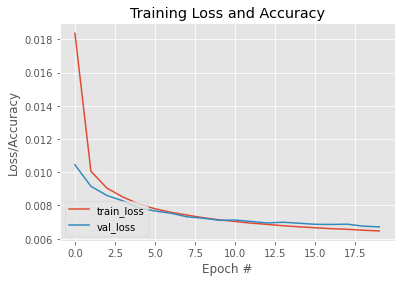

[INFO] saving autoencoder...


In [9]:
# используем сверточный автоэнкодер, чтобы сделать предсказания на
# тестовых изображения, создаем визуализацию, а затем сохраняем ее
# на диск
# use the convolutional autoencoder to make predictions on the
# testing images, construct the visualization, and then save it
# to disk
print("[INFO] making predictions...")
decoded = autoencoder.predict(testX)
vis = visualize_predictions(decoded, testX)
cv2.imwrite(args["vis"], vis)

# построим график, который отображает и сохраняет историю обучения
# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig(args["plot"])
plt.show()

# сериализуем модель автоэнкодера на диск
# serialize the autoencoder model to disk
print("[INFO] saving autoencoder...")
autoencoder.save(args["model"], save_format="h5")

### Реализация индексатора изображений с использованием обученного автокодировщика
### Implementing image indexer using the trained autoencoder

In [10]:
# явно укажем аргументы необходимые для работы
# model - путь к обученному автоэнкодеру
# index - путь к индексному файлу выходных признаков

# explicitly specify the arguments needed to work
# model - path to trained autoencoder
# index - path to output features index file
args = {
	"model": "output/autoencoder.h5",
	"index": "output/index.pickle"
}

In [11]:
# загружаем набор данных MNIST
# load the MNIST dataset
print("[INFO] loading MNIST training split...")
((trainX, _), (testX, _)) = mnist.load_data()

# добавляем размерность канала к каждому изображению в наборе данных, затем нормируем
# яркость пикселей в диапазоне [0, 1]
# add a channel dimension to every image in the training split, then
# scale the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
trainX = trainX.astype("float32") / 255.0

[INFO] loading MNIST training split...


In [12]:
# загружаем наш автоэнкодер и диска
# load our autoencoder from disk
print("[INFO] loading autoencoder model...")
autoencoder = load_model(args["model"])

# создаем модель энкодера, состоящую * только * из энкодера,
# части автоэнкодера
# create the encoder model which consists of *just* the encoder
# portion of the autoencoder
encoder = Model(inputs=autoencoder.input,
	outputs=autoencoder.get_layer("encoded").output)

# количественно оцениваем наши входные изображения с помощью энкодера
# quantify the contents of our input images using the encoder
print("[INFO] encoding images...")
features = encoder.predict(trainX)

[INFO] loading autoencoder model...
[INFO] encoding images...


In [13]:
# создадим словарь, который содержит индексы обучения датасета MNIST
# в соответствующем представлении в скрытом пространстве
# construct a dictionary that maps the index of the MNIST training
# image to its corresponding latent-space representation
indexes = list(range(0, trainX.shape[0]))
data = {"indexes": indexes, "features": features}

# записываем словарь с данными на диск
# write the data dictionary to disk
print("[INFO] saving index...")
f = open(args["index"], "wb")
f.write(pickle.dumps(data))
f.close()

[INFO] saving index...


### Реализация скрипта поиска и извлечения изображений с использованием Keras и TensorFlow
### Implementing the image search and retrieval script using Keras and TensorFlow

In [14]:
def euclidean(a, b):
    # вычисляем и возвращаем евклидово расстояние между двумя векторами
	# compute and return the euclidean distance between two vectors
	return np.linalg.norm(a - b)

In [15]:
def perform_search(queryFeatures, index, maxResults=64):
    # инициализируем наш список результатов
	# initialize our list of results
	results = []

	# loop over our index
	for i in range(0, len(index["features"])):
        # вычисляем евклидово расстояние между функциями нашего запроса
		# и функции для текущего изображения в нашем индексе, затем
		# обновить наш список результатов, добавив в него 2-кортеж, состоящий из
		# вычисленное расстояние и индекс изображения
		# compute the euclidean distance between our query features
		# and the features for the current image in our index, then
		# update our results list with a 2-tuple consisting of the
		# computed distance and the index of the image
		d = euclidean(queryFeatures, index["features"][i])
		results.append((d, i))

    # сортируем результаты и выбираем самые лучшие
	# sort the results and grab the top ones
	results = sorted(results)[:maxResults]

    # возвращаем список результатов
	# return the list of results
	return results

In [16]:
# явно укажем аргументы необходимые для работы
# model - путь к обученному автоэнкодеру
# index - путь к файлу индекса функций 
# sample - количество тестовых запросов для выполнения

# explicitly specify the arguments needed to work
# model - path to trained autoencoder
# index - path to features index file 
# sample - number of testing queries to perform
args = {
	"model": "output/autoencoder.h5",
	"index": "output/index.pickle",
    "sample": 10
}

In [17]:
# загружаем набор данных MNIST
# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, _), (testX, _)) = mnist.load_data()

# добавляем размерность канала к каждому изображению в наборе данных, затем нормируем
# яркость пикселей в диапазоне [0, 1]
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

[INFO] loading MNIST dataset...


In [18]:
# загружаем наш автоэнкодер и индексы с диска
# load the autoencoder model and index from disk
print("[INFO] loading autoencoder and index...")
autoencoder = load_model(args["model"])
index = pickle.loads(open(args["index"], "rb").read())

# создаем модель энкодера, состоящую * только * из энкодера
# часть автоэнкодера
# create the encoder model which consists of *just* the encoder
# portion of the autoencoder
encoder = Model(inputs=autoencoder.input,
	outputs=autoencoder.get_layer("encoded").output)

# количественно оцениваем наши входные изображения с помощью энкодера
# quantify the contents of our input testing images using the encoder
print("[INFO] encoding testing images...")
features = encoder.predict(testX)

[INFO] loading autoencoder and index...
[INFO] encoding testing images...


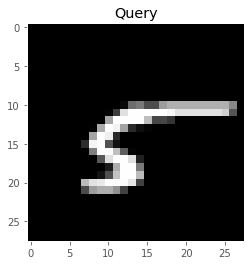

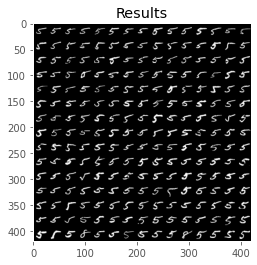

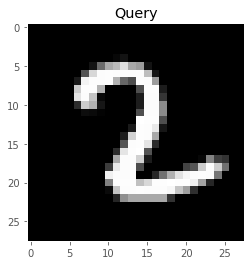

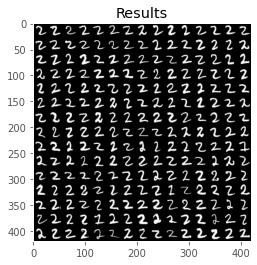

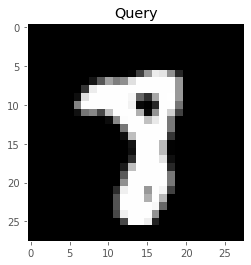

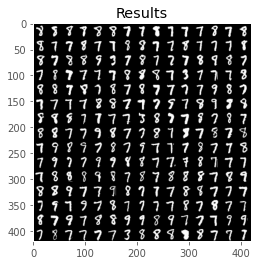

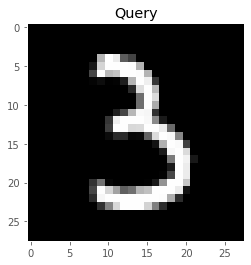

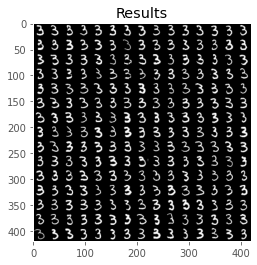

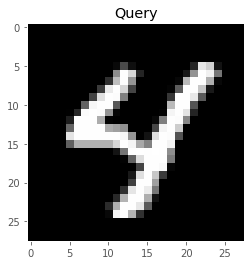

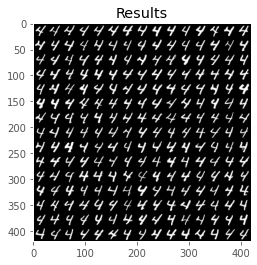

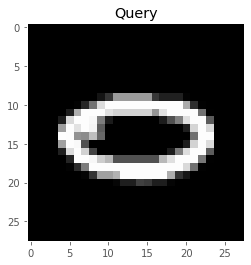

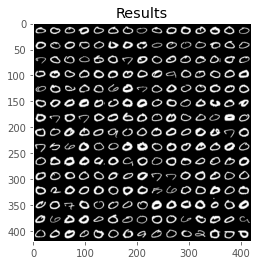

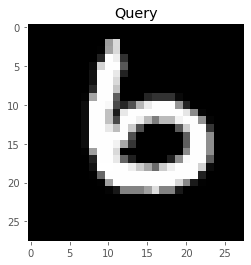

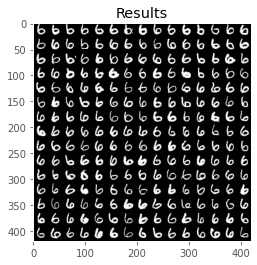

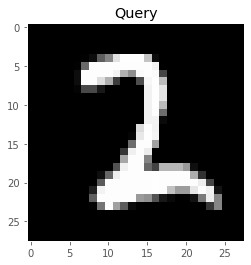

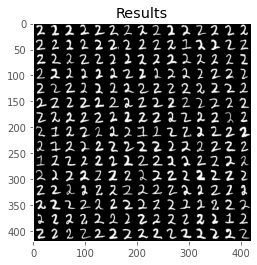

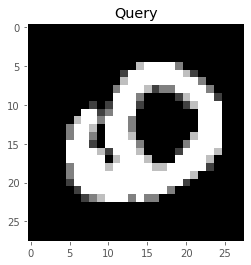

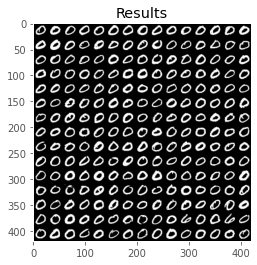

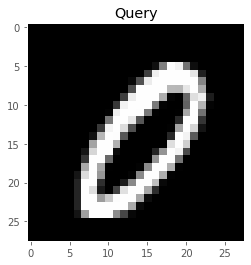

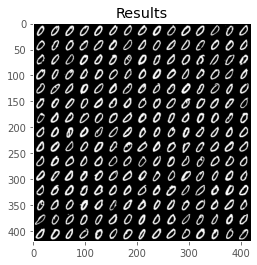

In [19]:
# произвольно выбираем набор индексов изображений тестового датасета
# randomly sample a set of testing query image indexes
queryIdxs = list(range(0, testX.shape[0]))
queryIdxs = np.random.choice(queryIdxs, size=args["sample"],
	replace=False)

# перебираем тестовые индексы
# loop over the testing indexes
for i in queryIdxs:
    # возьмем признаки текущего изображения, найдем все похожие
	# изображения в нашем наборе данных, а затем инициализируем наш список результатов
	# take the features for the current image, find all similar
	# images in our dataset, and then initialize our list of result
	# images
	queryFeatures = features[i]
	results = perform_search(queryFeatures, index, maxResults=225)
	images = []

    # перебираем результаты
	# loop over the results
	for (d, j) in results:
        # возьмем изображение результата, преобразуем его обратно в диапазон
		# [0, 255], а затем обновим список изображений
		# grab the result image, convert it back to the range
		# [0, 255], and then update the images list
		image = (trainX[j] * 255).astype("uint8")
		image = np.dstack([image] * 3)
		images.append(image)

    # отображаем выходное изображение
	# display the query image
	query = (testX[i] * 255).astype("uint8")
	plt_imshow("Query", query)

    # построим коллаж из результатов и отображаем его
	# build a montage from the results and display it
	montage = build_montages(images, (28, 28), (15, 15))[0]
	plt_imshow("Results", montage)